In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm , chi2
from matplotlib import pyplot as plt

In [24]:
ddof = [1 ,2 , 3 ,4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 50 , 40]

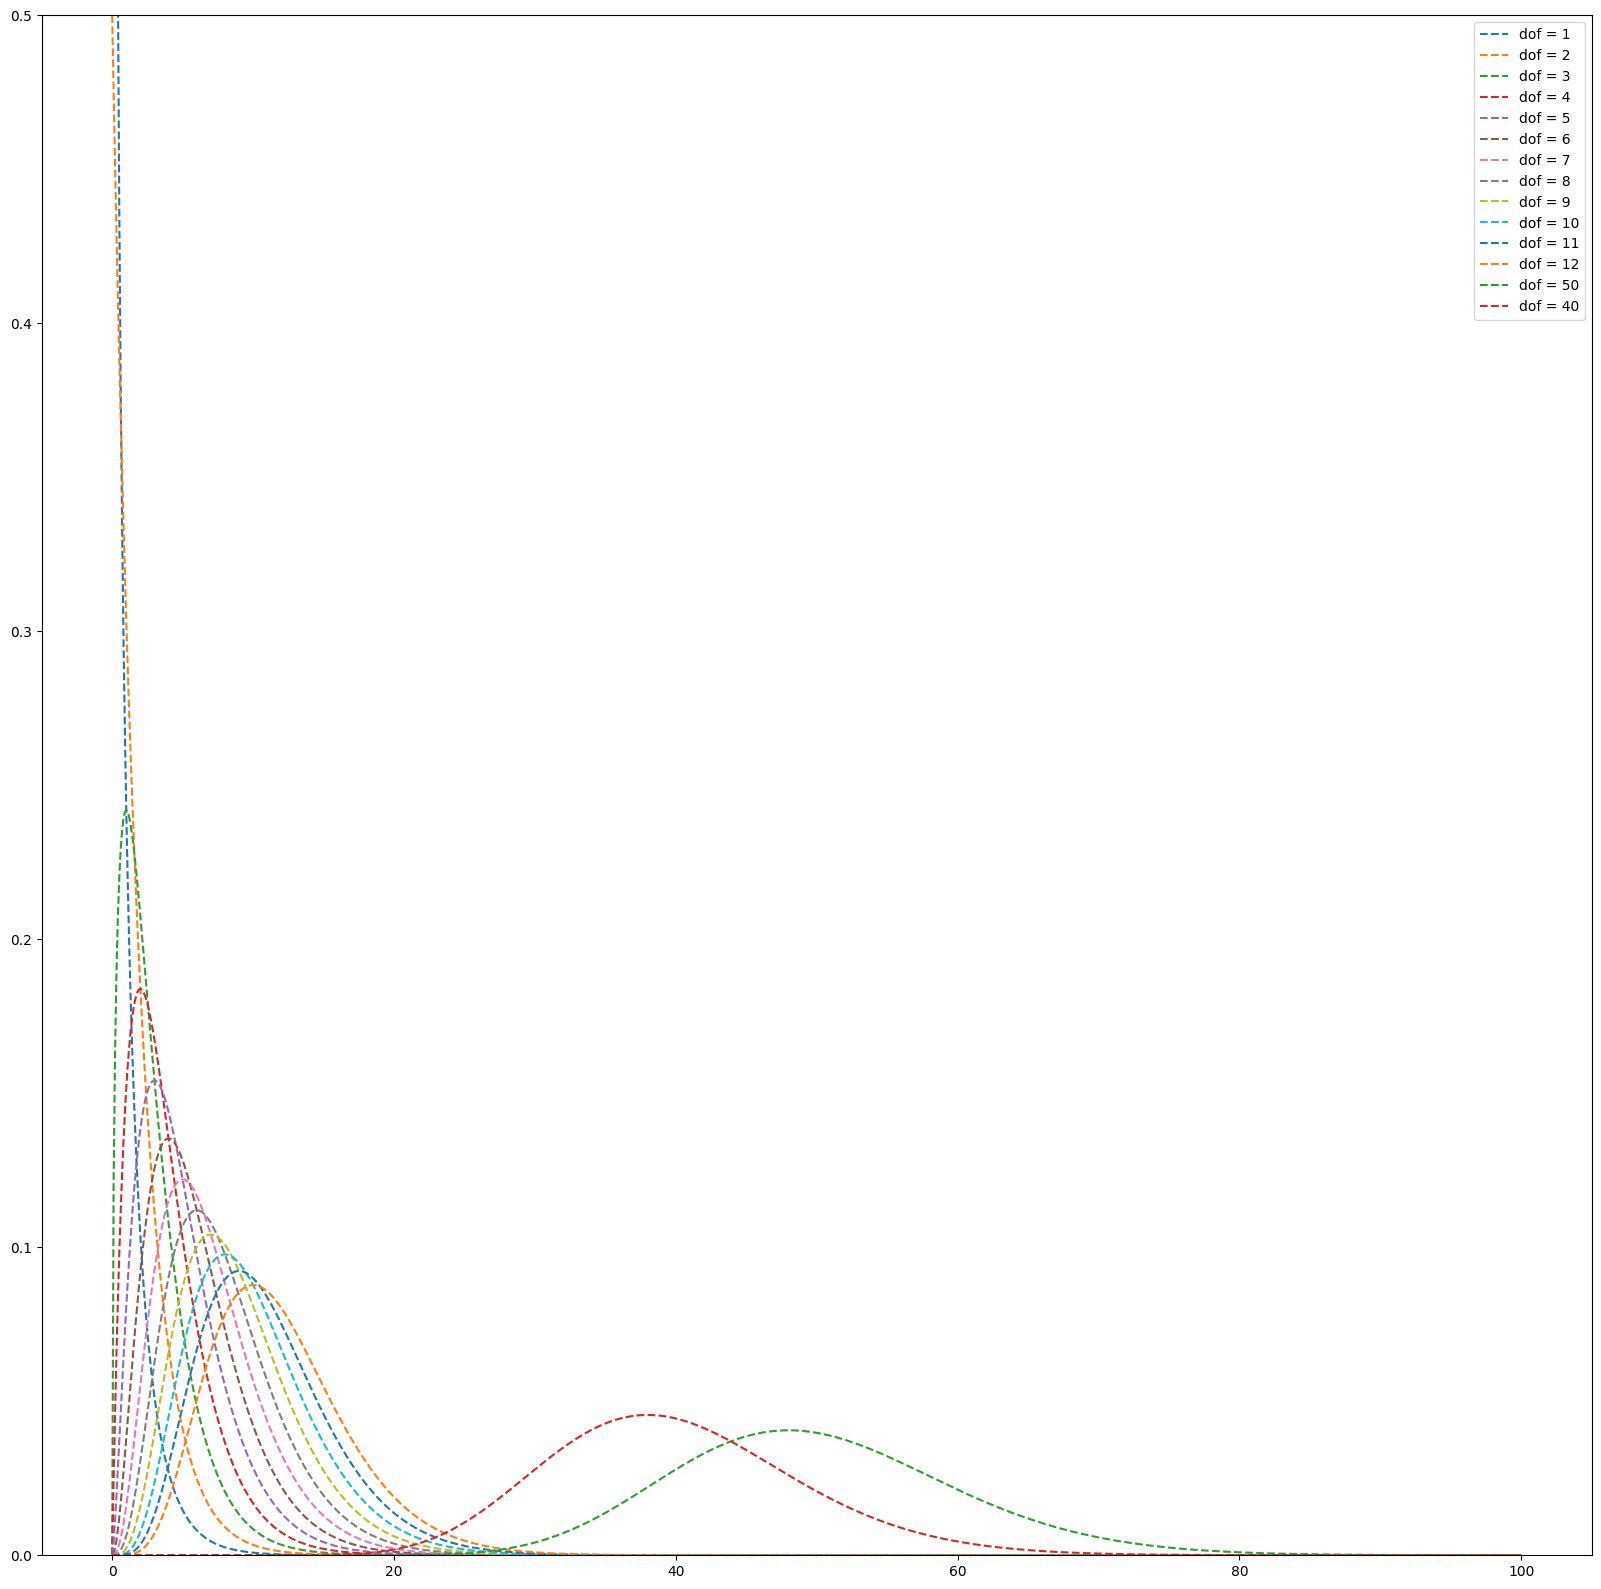

In [25]:
x = np.linspace( 0 , 100 , 1000)
plt.figure(figsize=(20,20))
for dof in ddof :
    y = chi2.pdf(x , dof)
    plt.plot(x , y , '--' , label = f'dof = {dof}')
plt.ylim(0,0.5)
plt.legend()
plt.show()

In [26]:
data = pd.read_csv('student-por.csv')

In [28]:
from scipy.stats import f 

In [37]:
x = np.linspace(0,100,1000)
y = f.pdf(x,8,3)

Text(0.6, 0.7, 'F - Distribution')

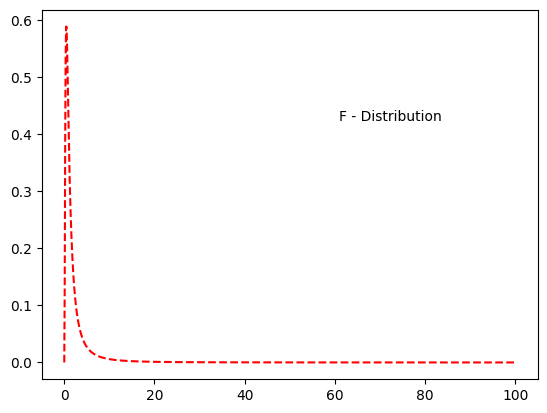

In [39]:
plt.plot(x , y , 'r--')
plt.annotate(text= f'F - Distribution' , xy = (0.6,0.7) , xycoords='axes fraction')

                                                  ******    Ratio of Sample Variances *******                                                  

            As We know that Ratio of Sample Variances will follow F-distribution with numerator DOF = numerator_sample_size - 1
                                                                                  denominator DOF = denominator_sample_size - 1

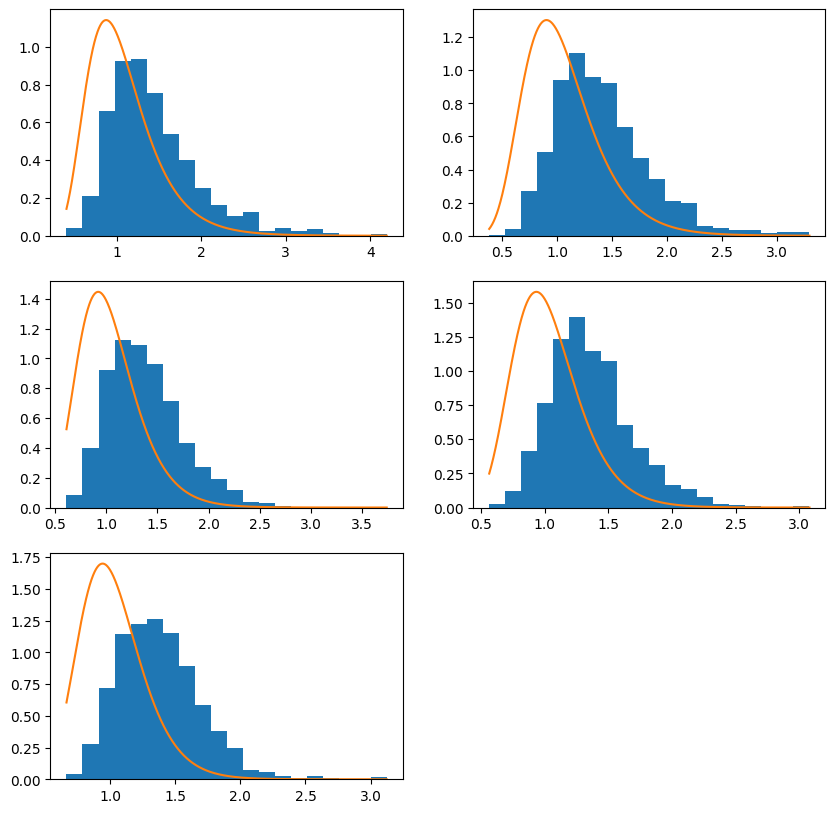

In [43]:
sample_size = [30+i for i in range(0 , 50 , 10)]
plt.figure(figsize=(10,10))
count = 1
for size in sample_size:
    plt.subplot(3,2 , count)
    sample_variances = []
    for i in range(1000):
        sample1 = data['age'].sample(size)
        sample2 = data['freetime'].sample(size)
        sample_variances.append(sample1.var(ddof=1) / sample2.var(ddof=1))

    lb = min(sample_variances)
    ub = max(sample_variances)
    x = np.linspace(lb , ub , 1000)
    y = f.pdf(x , size-1 , size-1)
    plt.hist(sample_variances , bins = 20 , range = (lb ,ub) , density = True )
    plt.plot(x,y)
    count += 1

            Lets Try with different Numerator DOF and Denominator DOF

In [49]:
n_sample_size = [i+10 for i in range(0,11,5)]
d_sample_size = [i+10 for i in range(0,21 , 10)]

In [50]:
n_sample_size

[10, 15, 20]

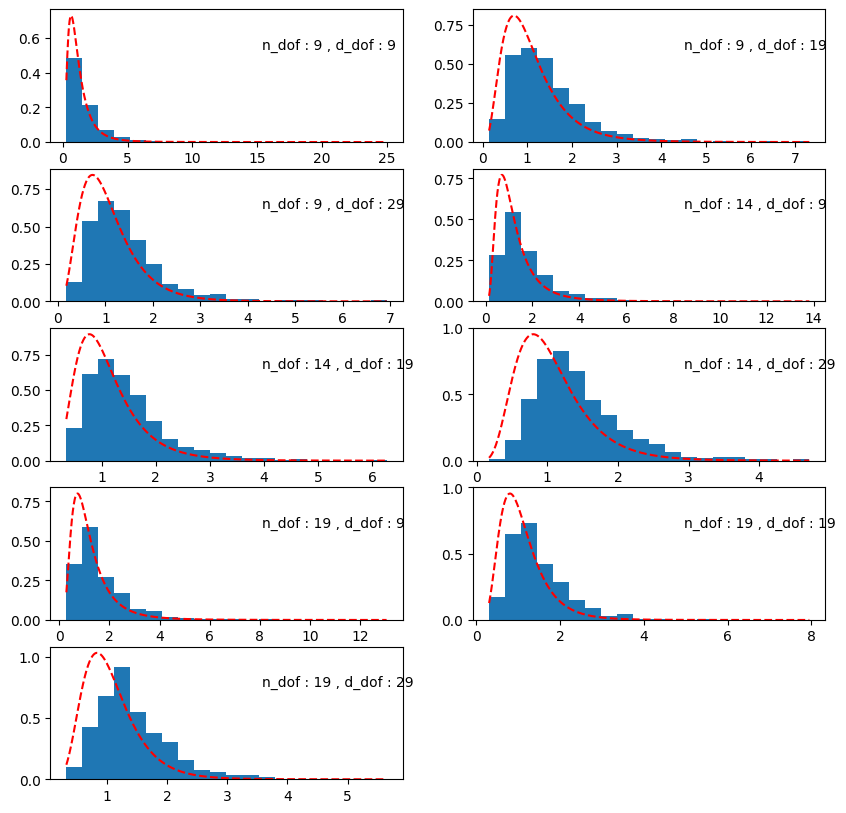

In [51]:
plt.figure(figsize = (10 , 10))
count = 1 
total =len(n_sample_size)*len(d_sample_size) 
if total%2 == 0 :
    ver = total//2 
else :
    ver = total//2 + 1 
hor = 2
for n_size in n_sample_size :
    for d_size in d_sample_size :
        plt.subplot(ver , hor , count)
        sample_variances = []
        for _ in range(1000):
            sample1 = data['age'].sample(n_size) 
            sample2 = data['freetime'].sample(d_size) 
            sample_variances.append(sample1.var(ddof = 1)/sample2.var(ddof = 1))
        lb = min(sample_variances)
        ub = max(sample_variances) 
        x = np.linspace(lb, ub,1000)
        y = f.pdf(x,n_size-1 , d_size-1)
        plt.hist(sample_variances , bins = 20 , range= (lb , ub) , density = True)
        plt.plot(x , y , 'r--')
        plt.annotate(text = f'n_dof : {n_size-1} , d_dof : {d_size-1}' , xy = (0.6 ,0.7) , xycoords='axes fraction')
        count += 1